# Explicación de Redes Neuronales Recurrentes (RNN)

En este cuaderno, explicaremos cómo funcionan las Redes Neuronales Recurrentes (RNN), sus aplicaciones, limitaciones y cómo se comparan con otras arquitecturas como LSTM y Transformers.

## Objetivos
- Comprender el funcionamiento básico de una RNN.
- Explorar cómo las RNN procesan secuencias de datos, especialmente en tareas de texto.
- Discutir las limitaciones de las RNN y sus desafíos.
- Comparar las RNN con LSTM y Transformers.

## 1. Introducción a las RNN
Las RNN son un tipo de red neuronal diseñada para trabajar con datos secuenciales, como texto, series temporales o secuencias de video. Su estructura les permite recordar información de estados anteriores, lo que las hace útiles para tareas en las que el contexto importa.

### Funcionamiento básico de una RNN
En una RNN, la salida de una celda recurrente en un paso temporal es pasada como entrada a la celda en el siguiente paso. Esto permite que la red acumule información a medida que avanza por la secuencia.

![Arquitectura básica de una RNN](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/2880px-Recurrent_neural_network_unfold.svg.png)

En la imagen, podemos ver cómo la misma celda se repite para cada paso en la secuencia, compartiendo los mismos pesos y acumulando el contexto a lo largo del tiempo.

### Explicación Matemática Detallada de las Redes Neuronales Recurrentes (RNN) con un Ejemplo

Las Redes Neuronales Recurrentes (RNN, por sus siglas en inglés) son un tipo de red neuronal diseñada para procesar secuencias de datos. Lo especial de las RNN es su capacidad para retener información de entradas anteriores en una secuencia, gracias a conexiones recurrentes en su arquitectura.

---

### **1. Arquitectura General de una RNN**

Una RNN procesa las entradas secuenciales paso a paso. En cada paso de tiempo $t$, se calcula un estado oculto $h_t$, que captura información sobre las entradas anteriores de la secuencia.

**Ecuaciones principales:**

1. Estado oculto:
   $$
   h_t = f(W_{hh}h_{t-1} + W_{xh}x_t + b_h)
   $$
   Donde:
   - $x_t$: Entrada en el paso de tiempo $t$.
   - $h_{t-1}$: Estado oculto del paso de tiempo anterior.
   - $W_{xh}$: Matriz de pesos que conecta la entrada con el estado oculto.
   - $W_{hh}$: Matriz de pesos recurrentes que conecta el estado oculto anterior al actual.
   - $b_h$: Vector de sesgo del estado oculto.
   - $f$: Función de activación, comúnmente $tanh$ o $ReLU$.

2. Salida:
   $$
   y_t = g(W_{hy}h_t + b_y)
   $$
   Donde:
   - $W_{hy}$: Matriz de pesos que conecta el estado oculto con la salida.
   - $b_y$: Vector de sesgo de la salida.
   - $g$: Función de activación para la salida (como softmax, sigmoid, etc.).

---

### **2. Propagación hacia adelante**

La RNN toma una entrada $x = \{x_1, x_2, \dots, x_T\}$ y genera una salida secuencial $y = \{y_1, y_2, \dots, y_T\}$. En cada paso de tiempo:
- El estado oculto $h_t$ depende de $x_t$ y $h_{t-1}$.
- La salida $y_t$ se calcula a partir de $h_t$.

Por ejemplo, para $t=3$:
$$
h_3 = f(W_{hh}h_2 + W_{xh}x_3 + b_h)
$$
$$
y_3 = g(W_{hy}h_3 + b_y)
$$

---

### **3. Ejemplo Numérico**

Supongamos una secuencia de entrada $x = \{1, 2, 3\}$ y queremos predecir una salida secuencial $y$. Usaremos una RNN simple con:
- Dimensión de la entrada $x_t \in \mathbb{R}^1$.
- Estado oculto $h_t \in \mathbb{R}^2$.
- Salida $y_t \in \mathbb{R}^1$.
- Función de activación: $f = tanh$, $g = sigmoid$.

**Pesos iniciales:**
$$
W_{xh} = \begin{bmatrix} 0.5 \\ -0.3 \end{bmatrix}, \quad
W_{hh} = \begin{bmatrix} 0.8 & -0.2 \\ 0.1 & 0.9 \end{bmatrix}, \quad
W_{hy} = \begin{bmatrix} 0.6 & -0.4 \end{bmatrix}
$$
$$
b_h = \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}, \quad
b_y = 0.2
$$

**Cálculos paso a paso:**

1. Paso $t=1$:
   $$
   h_1 = tanh(W_{xh}x_1 + b_h) = tanh\left(\begin{bmatrix} 0.5 \\ -0.3 \end{bmatrix} 1 + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}\right)
   $$
   $$
   h_1 = tanh\left(\begin{bmatrix} 0.6 \\ -0.2 \end{bmatrix}\right) = \begin{bmatrix} 0.537 \\ -0.197 \end{bmatrix}
   $$
   $$
   y_1 = sigmoid(W_{hy}h_1 + b_y) = sigmoid\left(0.6 \cdot 0.537 - 0.4 \cdot (-0.197) + 0.2\right)
   $$
   $$
   y_1 = sigmoid(0.652) \approx 0.657
   $$

2. Paso $t=2$:
   $$
   h_2 = tanh(W_{xh}x_2 + W_{hh}h_1 + b_h)
   $$
   Sustituyendo valores:
   $$
   h_2 = tanh\left(\begin{bmatrix} 0.5 \\ -0.3 \end{bmatrix} 2 + \begin{bmatrix} 0.8 & -0.2 \\ 0.1 & 0.9 \end{bmatrix} \begin{bmatrix} 0.537 \\ -0.197 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}\right)
   $$
   $$
   h_2 = tanh\left(\begin{bmatrix} 1.0 \\ -0.6 \end{bmatrix} + \begin{bmatrix} 0.467 \\ -0.038 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}\right)
   $$
   $$
   h_2 = tanh\left(\begin{bmatrix} 1.567 \\ -0.538 \end{bmatrix}\right) \approx \begin{bmatrix} 0.916 \\ -0.491 \end{bmatrix}
   $$
   $$
   y_2 = sigmoid(W_{hy}h_2 + b_y) = sigmoid(0.6 \cdot 0.916 - 0.4 \cdot (-0.491) + 0.2)
   $$
   $$
   y_2 = sigmoid(1.186) \approx 0.766
   $$

3. Paso $t=3$:
   De manera similar, calculamos:
   $$
   h_3 = tanh(W_{xh}x_3 + W_{hh}h_2 + b_h)
   $$
   $$
   y_3 = sigmoid(W_{hy}h_3 + b_y)
   $$

---

### **4. Retropropagación a través del tiempo (BPTT)**

Para entrenar una RNN, usamos **retropropagación a través del tiempo (BPTT)**:
1. Calculamos el error en cada paso de tiempo usando una función de pérdida $L(y_t, \hat{y}_t)$.
2. Propagamos el error hacia atrás a través del tiempo acumulando gradientes para $W_{xh}$, $W_{hh}$, $W_{hy}$, $b_h$, $b_y$.

---


La RNN, aunque simple, enfrenta problemas como el desvanecimiento del gradiente. Este problema puede mitigarse con arquitecturas avanzadas como **LSTM** o **GRU**, que introducen mecanismos para capturar dependencias a largo plazo. Este ejemplo proporciona una base sólida para comprender su funcionamiento matemático.

## 2. Procesamiento de Secuencias en una RNN
Veamos un ejemplo de cómo una RNN procesa una secuencia de texto para predecir la siguiente palabra en la secuencia. Usaremos un conjunto simple de oraciones.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
import numpy as np

# Datos de ejemplo
sentences = ["el gato juega", "el perro corre", "la luna brilla"]
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
max_sequence_len = max([len(x) for x in sequences])
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_len)

In [3]:
tokenizer.word_index

{'el': 1,
 'gato': 2,
 'juega': 3,
 'perro': 4,
 'corre': 5,
 'la': 6,
 'luna': 7,
 'brilla': 8}

In [4]:
# Dividir en características (X) y etiquetas (y)
X, y = sequences[:, :-1], sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index)+1)

In [5]:
sequences

array([[1, 2, 3],
       [1, 4, 5],
       [6, 7, 8]], dtype=int32)

In [6]:
X

array([[1, 2],
       [1, 4],
       [6, 7]], dtype=int32)

In [7]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
# Crear el modelo RNN
model_rnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_sequence_len-1),
    SimpleRNN(32),
    Dense(len(tokenizer.word_index)+1, activation='softmax')
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 8)              72        
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1312      
                                                                 
 dense (Dense)               (None, 9)                 297       
                                                                 
Total params: 1681 (6.57 KB)
Trainable params: 1681 (6.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Entrenamiento de la RNN
Entrenamos el modelo con las secuencias anteriores.

In [9]:
# Entrenar el modelo
history_rnn = model_rnn.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.1832 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 2.1722 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 2.1613 - accuracy: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 2.1502 - accuracy: 0.3333
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 2.1391 - accuracy: 0.3333
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 2.1279 - accuracy: 0.3333
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 2.1166 - accuracy: 0.6667
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 2.1050 - accuracy: 0.6667
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 2.0934 - accuracy: 0.6667
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 2.0815 - accuracy: 0.6667
Epoch 11/200
1/1 [====

### Visualización del rendimiento
Mostramos las curvas de precisión y pérdida del modelo durante el entrenamiento.

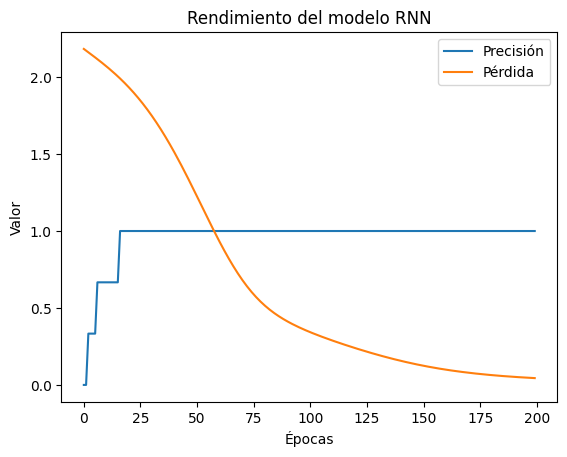

In [10]:
import matplotlib.pyplot as plt
# Graficar la precisión y la pérdida
plt.plot(history_rnn.history['accuracy'], label='Precisión')
plt.plot(history_rnn.history['loss'], label='Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Rendimiento del modelo RNN')
plt.legend()
plt.show()

In [11]:
## Predicción

# Crear una función para predecir la siguiente palabra

def predict_next_word(sentence):
    # Tokenizar la oración
    sequence = tokenizer.texts_to_sequences([sentence])[0]
    print(sequence)
    # Paddear la secuencia
    sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_sequence_len-1)
    print(sequence)
    # Predecir la siguiente palabra
    prediction = model_rnn.predict(sequence)
    print(prediction)
    # Obtener la palabra predicha
    predicted_word = tokenizer.index_word[np.argmax(prediction)]
    return predicted_word

# Probar la función

predict_next_word('El perro juega')



[1, 4, 3]
[[4 3]]
1/1 [==============================] - 0s 147ms/step
[[0.03492035 0.02271605 0.04608434 0.43492126 0.03849086 0.25766933
  0.02615697 0.04564793 0.09339294]]


'juega'

In [12]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 8)              72        
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1312      
                                                                 
 dense (Dense)               (None, 9)                 297       
                                                                 
Total params: 1681 (6.57 KB)
Trainable params: 1681 (6.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Limitaciones de las RNN
Las RNN enfrentan varios desafíos, entre ellos:
- **Desvanecimiento del gradiente**: A medida que la secuencia se hace más larga, las RNN tienen dificultades para recordar información de los primeros pasos, lo que limita su capacidad para manejar dependencias a largo plazo.
- **Paralelización**: Debido a la naturaleza secuencial de las RNN, es difícil paralelizar su entrenamiento, lo que las hace más lentas en comparación con otros modelos más recientes.


### Ejemplo de desvanecimiento de gradiente
Probemos con secuencias más largas para ver cómo afecta la precisión de las predicciones.

In [13]:
# Secuencias más largas
long_sentences = ["el gato juega en el jardín mientras el sol brilla", "la luna llena ilumina el cielo nocturno"]
long_sequences = tokenizer.texts_to_sequences(long_sentences)
long_sequences = tf.keras.preprocessing.sequence.pad_sequences(long_sequences, maxlen=max_sequence_len)

# Predicciones del modelo
predictions = model_rnn.predict(long_sequences)
predicted_words = [np.argmax(pred) for pred in predictions]
predicted_words_text = [list(tokenizer.word_index.keys())[list(tokenizer.word_index.values()).index(idx)] for idx in predicted_words]

print(f"Secuencias de entrada: {long_sentences}")
print(f"Palabras predichas: {predicted_words_text}")

1/1 [==============================] - 0s 122ms/step
Secuencias de entrada: ['el gato juega en el jardín mientras el sol brilla', 'la luna llena ilumina el cielo nocturno']
Palabras predichas: ['corre', 'brilla']


## 4. Comparación con LSTM y Transformers
Las LSTM y GRU son variantes de las RNN que abordan algunos de estos problemas, como el desvanecimiento del gradiente. Los Transformers, por otro lado, eliminan completamente la dependencia secuencial, lo que permite un procesamiento paralelo y mayor eficiencia.

### LSTM
Las LSTM utilizan celdas de memoria y puertas de entrada, olvido y salida para decidir qué información mantener o desechar. Esto les permite manejar dependencias a largo plazo de manera más efectiva.

### Transformers
Los Transformers utilizan mecanismos de atención que permiten a cada posición en una secuencia de entrada relacionarse directamente con cualquier otra posición, eliminando la necesidad de procesar los datos en orden secuencial.

En un cuaderno futuro, implementaremos estas variantes para comparar su rendimiento con las RNN.

## EJERCICIO RNN CON CIEN AÑOS DE SOLEDAD

In [14]:
## Cargamos el texto desde GitHub
import requests
url = 'https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/CAS.txt'
response = requests.get(url)
text = response.text
texto = text[:-190]
print(texto)

Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de 
recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces 
una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas 
que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos 
prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para 
mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia 
de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y 
timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de 
barba montaraz y manos de gorrión, que se presentó con el nombre de Melquíades, hizo una 
truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios 
alquimistas de Macedonia. Fue de casa en casa arrastrando do

In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
texto = texto.lower()

## Tokenizar

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tokens = word_tokenize(texto)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['muchos',
 'años',
 'después',
 ',',
 'frente',
 'al',
 'pelotón',
 'de',
 'fusilamiento',
 ',',
 'el',
 'coronel',
 'aureliano',
 'buendía',
 'había',
 'de',
 'recordar',
 'aquella',
 'tarde',
 'remota',
 'en',
 'que',
 'su',
 'padre',
 'lo',
 'llevó',
 'a',
 'conocer',
 'el',
 'hielo',
 '.',
 'macondo',
 'era',
 'entonces',
 'una',
 'aldea',
 'de',
 'veinte',
 'casas',
 'de',
 'barro',
 'y',
 'cañabrava',
 'construidas',
 'a',
 'la',
 'orilla',
 'de',
 'un',
 'río',
 'de',
 'aguas',
 'diáfanas',
 'que',
 'se',
 'precipitaban',
 'por',
 'un',
 'lecho',
 'de',
 'piedras',
 'pulidas',
 ',',
 'blancas',
 'y',
 'enormes',
 'como',
 'huevos',
 'prehistóricos',
 '.',
 'el',
 'mundo',
 'era',
 'tan',
 'reciente',
 ',',
 'que',
 'muchas',
 'cosas',
 'carecían',
 'de',
 'nombre',
 ',',
 'y',
 'para',
 'mencionarlas',
 'había',
 'que',
 'señalarías',
 'con',
 'el',
 'dedo',
 '.',
 'todos',
 'los',
 'años',
 ',',
 'por',
 'el',
 'mes',
 'de',
 'marzo',
 ',',
 'una',
 'familia',
 'de',
 'gitanos

In [17]:
len(set(tokens))

16232

In [18]:
## Creamos el corpus
n=10
corpus = []
for i in range(len(tokens)-n):
  corpus.append(tokens[i:i+n])
corpus[0:10]

[['muchos',
  'años',
  'después',
  ',',
  'frente',
  'al',
  'pelotón',
  'de',
  'fusilamiento',
  ','],
 ['años',
  'después',
  ',',
  'frente',
  'al',
  'pelotón',
  'de',
  'fusilamiento',
  ',',
  'el'],
 ['después',
  ',',
  'frente',
  'al',
  'pelotón',
  'de',
  'fusilamiento',
  ',',
  'el',
  'coronel'],
 [',',
  'frente',
  'al',
  'pelotón',
  'de',
  'fusilamiento',
  ',',
  'el',
  'coronel',
  'aureliano'],
 ['frente',
  'al',
  'pelotón',
  'de',
  'fusilamiento',
  ',',
  'el',
  'coronel',
  'aureliano',
  'buendía'],
 ['al',
  'pelotón',
  'de',
  'fusilamiento',
  ',',
  'el',
  'coronel',
  'aureliano',
  'buendía',
  'había'],
 ['pelotón',
  'de',
  'fusilamiento',
  ',',
  'el',
  'coronel',
  'aureliano',
  'buendía',
  'había',
  'de'],
 ['de',
  'fusilamiento',
  ',',
  'el',
  'coronel',
  'aureliano',
  'buendía',
  'había',
  'de',
  'recordar'],
 ['fusilamiento',
  ',',
  'el',
  'coronel',
  'aureliano',
  'buendía',
  'había',
  'de',
  'recordar',

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
import numpy as np

# Datos de ejemplo
sentences = [' '.join(text) for text in corpus]
sentences[:5]
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='\t\n')
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
max_sequence_len = max([len(x) for x in sequences])
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_len)

# Dividir en características (X) y etiquetas (y)
X, y = sequences[:, :-1], sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index)+1)

# Crear el modelo RNN
model_rnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=256, input_length=max_sequence_len-1),
    SimpleRNN(32),
    Dense(len(tokenizer.word_index)+1, activation='softmax')
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 9, 256)            4155648   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                9248      
                                                                 
 dense_1 (Dense)             (None, 16233)             535689    
                                                                 
Total params: 4700585 (17.93 MB)
Trainable params: 4700585 (17.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Entrenar el modelo
history_rnn = model_rnn.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
4777/4777 [==============================] - 495s 103ms/step - loss: 6.2554 - accuracy: 0.1105
Epoch 2/10
1862/4777 [==========>...................] - ETA: 4:57 - loss: 5.4217 - accuracy: 0.1641

KeyboardInterrupt: 